# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

In this Jupyter notebook, I will be building a **data science project**, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a regression model of aromatase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [3]:
import numpy
import sklearn
print(numpy.__version__)
print(sklearn.__version__)

1.26.4
1.5.2


In [62]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

## **2. Load the data set**

In [4]:
df = pd.read_csv('era_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Estrogen receptor alpha *** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [8]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3076,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3077,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3078,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [11]:
Y = df.pIC50
Y

0       8.602060
1       8.124939
2       8.508638
3       8.408935
4       8.130768
          ...   
3075    7.882729
3076    6.508638
3077    7.823909
3078    7.302771
3079    4.580044
Name: pIC50, Length: 3080, dtype: float64

### **3.3. Let's examine the data dimension**

In [14]:
X.shape

(3080, 881)

In [16]:
Y.shape

(3080,)

### **3.4. Remove low variance features**

In [19]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,...,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP782,PubchemFP797,PubchemFP798,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821
0,1,1,1,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,1,1,1,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,0,1,1,0,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0
3,1,1,1,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,1,0,1,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,1,0,1,1,1,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,1
3076,1,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,1,0,1,1,0
3077,1,1,1,1,0,0,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0
3078,1,1,1,0,0,0,1,1,1,1,...,1,1,0,0,1,1,0,1,0,0


In [21]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [23]:
X.shape

(3080, 147)

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [64]:
pca = PCA(n_components=120)
pc = pca.fit_transform(df)
pc_df = pd.DataFrame(data = pc)

In [66]:
pc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,3.728591,2.199339,2.299658,-3.019069,0.924291,0.593706,0.869455,0.352975,-0.117821,-0.842381,...,0.174486,-0.185317,-0.016643,0.074486,0.220067,0.053630,-0.114366,0.105744,0.231516,-0.004173
1,3.727195,2.103249,2.076841,-3.175563,0.611428,0.541645,0.726404,0.441810,-0.462288,-0.841960,...,0.037688,-0.127808,-0.031630,0.064704,0.086475,0.178243,-0.036697,0.115161,0.191660,0.123431
2,3.840966,2.443570,2.195471,-3.095250,0.799068,0.783396,0.912713,0.729254,-0.672990,-0.785916,...,0.038797,-0.033662,-0.014362,-0.056368,0.000334,0.045615,0.013835,-0.016820,0.024143,-0.043336
3,3.818473,2.265303,2.296658,-3.114333,0.683376,0.712626,0.734224,0.511434,-0.425135,-0.778694,...,-0.024311,-0.070284,0.009967,-0.193943,0.007351,0.019983,-0.033653,0.013227,0.073476,-0.041597
4,3.746163,2.278356,2.071482,-3.157088,0.592666,0.636674,0.934096,0.578872,-0.713406,-0.762744,...,-0.036604,-0.001610,0.107012,-0.132238,-0.039211,0.069589,-0.051918,0.079795,-0.021794,-0.046334


In [68]:
pca.explained_variance_ratio_

array([0.1958701 , 0.09126893, 0.08047275, 0.05181417, 0.04096134,
       0.0342286 , 0.03075376, 0.02665493, 0.02230531, 0.02067405,
       0.01752058, 0.01696657, 0.01503459, 0.01263036, 0.01192646,
       0.01081171, 0.01043865, 0.00999516, 0.00880943, 0.00868956,
       0.00814808, 0.0075744 , 0.00747728, 0.00710319, 0.00674463,
       0.00657506, 0.00625669, 0.00609549, 0.0058402 , 0.0054998 ,
       0.00512791, 0.00495896, 0.00479809, 0.00475478, 0.00459489,
       0.00450377, 0.00435659, 0.00413507, 0.00401019, 0.00377952,
       0.00370587, 0.003565  , 0.00337191, 0.00320476, 0.00318904,
       0.00312801, 0.0030695 , 0.0028709 , 0.00280407, 0.00278434,
       0.00265584, 0.00256412, 0.00248708, 0.00239439, 0.00235442,
       0.00229943, 0.00225556, 0.0022269 , 0.00217317, 0.00207944,
       0.00204018, 0.00202496, 0.00190847, 0.00185201, 0.00179514,
       0.00176898, 0.00174336, 0.00171384, 0.00168798, 0.00163963,
       0.00160885, 0.00157959, 0.00150535, 0.00147982, 0.00143

## **4. Data split (80/20 ratio)**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(pc_df, Y, test_size=0.10, random_state=45)

In [73]:
X_train.shape, y_train.shape

((2772, 120), (2772,))

In [75]:
X_test.shape, y_test.shape

((308, 120), (308,))

## **5. Building a Regression Model using Random Forest**

In [78]:
# Define a parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 8, 12, 20],
    'min_samples_split': [2, 5, 10]
}

In [80]:
# Create a RandomForestRegressor object
model = RandomForestRegressor()

In [82]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

In [84]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 8, 12, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [86]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


In [88]:
# Best parameters from grid search
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [90]:
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
# Use the best model for predictions and evaluation
model.fit(X, Y)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The r2 score for train set is : {best_model.score(X_train, y_train)}')
print(f'The r2 score for test set is : {best_model.score(X_test, y_test)}')
print("Mean Squared Error with tuned hyperparameters:", mse)

The r2 score for train set is : 0.9914713818623435
The r2 score for test set is : 0.9338531938675296
Mean Squared Error with tuned hyperparameters: 0.16983409539735259


In [98]:
Y_pred = best_model.predict(X_test)
Y_pred

array([ 8.17416195,  6.62442939,  4.54699689,  8.53348923,  4.97369725,
        4.557739  ,  8.49525739,  5.29087485,  5.91424493,  7.76929104,
        8.3465268 ,  5.16397398,  5.25912615,  6.96581867,  6.23288783,
        6.3761294 ,  5.89535115,  6.63586685,  4.54261573,  6.60031693,
        7.13105845,  4.70492426,  6.16784721,  8.06531727,  7.29521807,
        6.69027244,  8.15356484,  9.06825579,  6.52598147,  7.31192681,
        7.04638024,  5.2763733 ,  6.39309617,  4.85858926,  9.0186056 ,
        6.37757292,  7.00429585,  4.47545071,  5.50178134,  4.6153722 ,
        7.08298469,  6.50856264,  8.39892044,  6.2934283 ,  6.04884009,
        5.19957404,  4.78185992,  8.36221741,  8.6783057 ,  4.87555389,
        5.27424528,  7.01260545,  6.56738496,  8.46892111,  8.99147034,
        7.57659222,  5.11311884,  9.07256256,  7.05994009,  7.32448951,
        7.04694606,  4.86374665,  5.53196996,  6.85757727,  5.32190936,
        7.78486446,  6.23838044,  5.62327161,  8.19640648,  3.60

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

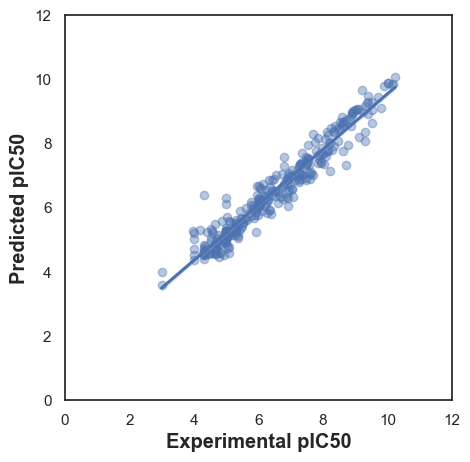

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show
plt.savefig('plot_experimental_vs_Predicted_pIC50.pdf')

# Save Model as Pickle Object

In [104]:
import pickle

In [110]:
pickle.dump(best_model, open('eraa_model.pkl', 'wb'))